In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
from tqdm import tqdm

In [2]:
url = 'https://www.pagina12.com.ar/'
p12 = requests.get(url)

In [3]:
p12.status_code

200

In [4]:
s = BeautifulSoup(p12.text, 'lxml')

In [5]:
secciones = s.find('ul', attrs={'class':'hot-sections'}).find_all('li')
secciones

[<li class=""><a href="https://www.pagina12.com.ar/secciones/el-pais">El país</a></li>,
 <li class=""><a href="https://www.pagina12.com.ar/secciones/economia">Economía</a></li>,
 <li class="no-border"><a href="https://www.pagina12.com.ar/secciones/sociedad">Sociedad</a></li>,
 <li class="show-for-large"><a href="https://www.pagina12.com.ar/suplementos/cultura-y-espectaculos">Cultura y Espectáculos</a></li>,
 <li class="show-for-large"><a href="https://www.pagina12.com.ar/secciones/ciencia">Ciencia</a></li>,
 <li class="show-for-large"><a href="https://www.pagina12.com.ar/secciones/el-mundo">El mundo</a></li>,
 <li class="show-for-large"><a href="https://www.pagina12.com.ar/secciones/deportes">Deportes</a></li>,
 <li class="show-for-large"><a href="https://www.pagina12.com.ar/secciones/contratapa">Contratapa</a></li>]

In [6]:
links_secciones = [sec.a.get('href') for sec in secciones]
links_secciones

['https://www.pagina12.com.ar/secciones/el-pais',
 'https://www.pagina12.com.ar/secciones/economia',
 'https://www.pagina12.com.ar/secciones/sociedad',
 'https://www.pagina12.com.ar/suplementos/cultura-y-espectaculos',
 'https://www.pagina12.com.ar/secciones/ciencia',
 'https://www.pagina12.com.ar/secciones/el-mundo',
 'https://www.pagina12.com.ar/secciones/deportes',
 'https://www.pagina12.com.ar/secciones/contratapa']

## Obteniendo listado de notas

Probemos con una sección cualquiera

In [7]:
sec = requests.get(links_secciones[0])
sec.status_code

200

In [8]:
s = BeautifulSoup(sec.text, 'lxml')

In [9]:
print(s.prettify())

<!DOCTYPE html>
<html class="no-js">
 <head>
  <meta charset="utf-8"/>
  <title>
   El país | Página12
  </title>
  <link href="https://www.pagina12.com.ar/secciones/el-pais" rel="canonical"/>
  <script type="application/ld+json">
   {"@context": "http://schema.org","@type": "Organization","url": "https://www.pagina12.com.ar","logo": "https://www.pagina12.com.ar/assets/media/logo_default_p12.png"}
  </script>
  <meta content="La puja política de coyuntura y la reflexión de prestigiosos columnistas sobre la actualidad.
" name="description" property="description"/>
  <meta content="1541638399393436" name="fb:pages" property="fb:pages"/>
  <meta content="es_AR" name="og:locale" property="og:locale"/>
  <meta content="El país | Página12" name="og:title" property="og:title"/>
  <meta content="PAGINA12" name="og:site_name" property="og:site_name"/>
  <meta content="website" name="og:type" property="og:type"/>
  <meta content="https://www.pagina12.com.ar/secciones/el-pais" name="og:url" prope

Vemos que hay un *featured article* principal y después una lista de artículos dentro de un tag `<ul>` con el resto de las notas.
#### Extrayendo el *featured article*

In [10]:
featured_article = s.find('div', attrs={'class':'featured-article__container'})
featured_article

<div class="featured-article__container"><span class="title-prefix"><a href="https://www.pagina12.com.ar/293257-las-mejores-fotos-del-banderazo-contra-el-gobierno-y-la-cuar">Galería de imágenes </a></span><h2><a href="https://www.pagina12.com.ar/293257-las-mejores-fotos-del-banderazo-contra-el-gobierno-y-la-cuar">Las mejores fotos del banderazo contra el Gobierno y la cuarentena </a></h2><a href="https://www.pagina12.com.ar/293257-las-mejores-fotos-del-banderazo-contra-el-gobierno-y-la-cuar"><p class="subhead"></p></a><div class="data-bar"><span class="date-1">19 de septiembre de 2020</span></div></div>

In [11]:
featured_article.a.get('href')

'https://www.pagina12.com.ar/293257-las-mejores-fotos-del-banderazo-contra-el-gobierno-y-la-cuar'

#### Extrayendo el resto de las notas

In [12]:
article_list = s.find('ul', attrs={'class':'article-list'})

Y dentro de la lista hay varios `<li>` con los items

In [13]:
print(article_list.find_all('li'))

[<li></li>, <li><div class="article-box-sections article-box--white-box article-box--printed article-box--with-image article-box--not-using-section-label" data-order="100"><div class="first-col column small-8 xsmall-8"><div class="article-box__container"><h5 class="hide-for-xsmall-only hide-for-small-only"></h5><h2><a href="https://www.pagina12.com.ar/293252-nuevo-banderazo-viejas-consignas-contra-el-gobierno-y-los-mo">Nuevo banderazo: viejas consignas contra el Gobierno y los movimientos antivacunas en el centro de la escena <i>|</i><span>Fue alentado y respaldado por la oposición</span></a></h2><div class="data-bar"><span class="date-1">19 de septiembre de 2020</span></div></div></div><div class="second-col column small-4 xsmall-4 no-pad-left-sm"><div class="article-box__image-container"><a class="relative object-fit intrinsic-container intrinsic-container-16x9" href="https://www.pagina12.com.ar/293252-nuevo-banderazo-viejas-consignas-contra-el-gobierno-y-los-mo"><img alt="false (Fue

Nos quedamos con el texto de cada item para ver qué contienen

In [14]:
print([li.get_text() for li in article_list.find_all('li')])

['', 'Nuevo banderazo: viejas consignas contra el Gobierno y los movimientos antivacunas en el centro de la escena\xa0|Fue alentado y respaldado por la oposición19 de septiembre de 2020', '', 'El papa Francisco nombró a Gustavo Béliz en la Academia Pontificia de Ciencias Sociales|En qué consiste el nuevo cargo\xa019 de septiembre de 2020|Por Washington Uranga', '', 'La conmovedora entrevista a Francisco Madariaga Quintela en el día que recuperó su identidad\xa0|“Que te cuenten tu historia es un regalo de la vida”, le decía el nieto 101 a Página/12 en 201019 de septiembre de 2020|Por Diego Martínez', '', 'Murió Francisco Madariaga Quintela, el nieto recuperado 101|Tenía 43 años y se pudo reencontrar con su padre en 201019 de septiembre de 2020', '', '¡Enciendan la Betoseñal!19 de septiembre de 2020|Por Marcelo Rudaeff (Rudy)', '', 'Alberto Fernández: "Ahora parece que nadie es macrista, pido un poco de prudencia"|El Presidente cuestionó el "desastre" que dejó el macrismo19 de septiembre

Vemos que hay varios tags vacíos. Procedemos a eliminarlos

In [15]:
for li in article_list.find_all('li'):
    if len(li.get_text()) == 0:
        li.decompose()    #Quita los espacios sin 

In [16]:
print([li.get_text() for li in article_list.find_all('li')])

['Nuevo banderazo: viejas consignas contra el Gobierno y los movimientos antivacunas en el centro de la escena\xa0|Fue alentado y respaldado por la oposición19 de septiembre de 2020', 'El papa Francisco nombró a Gustavo Béliz en la Academia Pontificia de Ciencias Sociales|En qué consiste el nuevo cargo\xa019 de septiembre de 2020|Por Washington Uranga', 'La conmovedora entrevista a Francisco Madariaga Quintela en el día que recuperó su identidad\xa0|“Que te cuenten tu historia es un regalo de la vida”, le decía el nieto 101 a Página/12 en 201019 de septiembre de 2020|Por Diego Martínez', 'Murió Francisco Madariaga Quintela, el nieto recuperado 101|Tenía 43 años y se pudo reencontrar con su padre en 201019 de septiembre de 2020', '¡Enciendan la Betoseñal!19 de septiembre de 2020|Por Marcelo Rudaeff (Rudy)', 'Alberto Fernández: "Ahora parece que nadie es macrista, pido un poco de prudencia"|El Presidente cuestionó el "desastre" que dejó el macrismo19 de septiembre de 2020', 'Santiago Caf

Ya obtuvimos los tags con contenido. Ahora extraemos los links a las notas.

In [17]:
items = [li.a.get('href') for li in article_list.find_all('li')]
items

['https://www.pagina12.com.ar/293252-nuevo-banderazo-viejas-consignas-contra-el-gobierno-y-los-mo',
 'https://www.pagina12.com.ar/293244-el-papa-francisco-nombro-a-gustavo-beliz-en-la-academia-pont',
 'https://www.pagina12.com.ar/293236-la-conmovedora-entrevista-a-francisco-madariaga-quintela-en-',
 'https://www.pagina12.com.ar/293225-murio-francisco-madariaga-quintela-el-nieto-recuperado-101',
 'https://www.pagina12.com.ar/293209-enciendan-la-betosenal',
 'https://www.pagina12.com.ar/293206-alberto-fernandez-ahora-parece-que-nadie-es-macrista-pido-un',
 'https://www.pagina12.com.ar/293201-santiago-cafiero-duhalde-esta-mal-lo-tiene-que-cuidar-la-fam',
 'https://www.pagina12.com.ar/293197-vacuna-contra-el-coronavirus-el-gobierno-definio-pautas-para',
 'https://www.pagina12.com.ar/293108-el-estado-sera-querellante-en-la-causa-mas-grave-contra-macr',
 'https://www.pagina12.com.ar/293121-coronavirus-en-argentina-197-nuevas-muertes-y-11-945-nuevos-',
 'https://www.pagina12.com.ar/293145-las

Ahora metamos todo el proceso en una función

In [18]:
def scrap_section_page(url):
    '''
    Función que recibe la url de una sección del diario y devuelve una lista con los links a las notas
    '''
    
    # Obtenemos la página
    try:
        r = requests.get(url)
    except Exception as e:
        print('Error obteniendo la página. Excepción ',e)
        return np.nan
    
    if r.status_code != 200:
        print('Error obteniendo la página. Status Code', r.status_code)
        return np.nan
    
    # Generamos una lista vacía para ir poblándola con las notas
    lista_notas = []
    
    # Parseamos el HTML de la página
    s = BeautifulSoup(r.text, 'lxml')
    
    # Obtenemos la noticia promocionada
    featured_article = s.find('div', attrs={'class':'featured-article__container'})
    if featured_article is not None:
        try:
            lista_notas.append(featured_article.a.get('href'))
        except:
            pass
    
    # Obtenemos la lista de noticias
    article_list = s.find('ul', attrs={'class':'article-list'})
    # Obtenemos los items de la lista
    items = article_list.find_all('li')
    # Extraemos los links de los items que no están vacíos
    for li in items:
        if li.a is not None:
            lista_notas.append(li.a.get('href'))
    
    return lista_notas

Probemos la función

In [19]:
scrap_section_page(links_secciones[0])

['https://www.pagina12.com.ar/293257-las-mejores-fotos-del-banderazo-contra-el-gobierno-y-la-cuar',
 'https://www.pagina12.com.ar/293252-nuevo-banderazo-viejas-consignas-contra-el-gobierno-y-los-mo',
 'https://www.pagina12.com.ar/293244-el-papa-francisco-nombro-a-gustavo-beliz-en-la-academia-pont',
 'https://www.pagina12.com.ar/293236-la-conmovedora-entrevista-a-francisco-madariaga-quintela-en-',
 'https://www.pagina12.com.ar/293225-murio-francisco-madariaga-quintela-el-nieto-recuperado-101',
 'https://www.pagina12.com.ar/293209-enciendan-la-betosenal',
 'https://www.pagina12.com.ar/293206-alberto-fernandez-ahora-parece-que-nadie-es-macrista-pido-un',
 'https://www.pagina12.com.ar/293201-santiago-cafiero-duhalde-esta-mal-lo-tiene-que-cuidar-la-fam',
 'https://www.pagina12.com.ar/293197-vacuna-contra-el-coronavirus-el-gobierno-definio-pautas-para',
 'https://www.pagina12.com.ar/293108-el-estado-sera-querellante-en-la-causa-mas-grave-contra-macr',
 'https://www.pagina12.com.ar/293121-cor

Para extraer varias páginas de la misma sección:

In [20]:
notas = []
for link in links_secciones:
    for pagina in range(5):
        url = link+f'?page={pagina}'
        print(f'Obteniendo links de {url}')
        notas += scrap_section_page(url)

Obteniendo links de https://www.pagina12.com.ar/secciones/el-pais?page=0
Obteniendo links de https://www.pagina12.com.ar/secciones/el-pais?page=1
Obteniendo links de https://www.pagina12.com.ar/secciones/el-pais?page=2
Obteniendo links de https://www.pagina12.com.ar/secciones/el-pais?page=3
Obteniendo links de https://www.pagina12.com.ar/secciones/el-pais?page=4
Obteniendo links de https://www.pagina12.com.ar/secciones/economia?page=0
Obteniendo links de https://www.pagina12.com.ar/secciones/economia?page=1
Obteniendo links de https://www.pagina12.com.ar/secciones/economia?page=2
Obteniendo links de https://www.pagina12.com.ar/secciones/economia?page=3
Obteniendo links de https://www.pagina12.com.ar/secciones/economia?page=4
Obteniendo links de https://www.pagina12.com.ar/secciones/sociedad?page=0
Obteniendo links de https://www.pagina12.com.ar/secciones/sociedad?page=1
Obteniendo links de https://www.pagina12.com.ar/secciones/sociedad?page=2
Obteniendo links de https://www.pagina12.co

In [21]:
len(notas)

529

Eliminamos notas duplicadas

In [22]:
notas = set(notas)

In [23]:
len(notas)

524

In [24]:
np.random.choice(list(notas),10)

array(['https://www.pagina12.com.ar/292610-coronavirus-francia-cerro-mas-de-80-escuelas-por-el-aumento-',
       'https://www.pagina12.com.ar/292304-defensa-y-justicia-apostara-todo-al-ataque-en-la-copa-libert',
       'https://www.pagina12.com.ar/237300-sandra-diaz-fue-reconocida-por-nature-como-una-de-las-diez-p',
       'https://www.pagina12.com.ar/293072-cristina-kirchner-el-de-la-quinta-de-mauricio-macri-fue-un-f',
       'https://www.pagina12.com.ar/292975-hallan-en-arabia-evidencia-de-presencia-humana-hace-120-mil-',
       'https://www.pagina12.com.ar/292612-coparticipacion-el-regalo-de-86-mil-millones-de-pesos-que-ma',
       'https://www.pagina12.com.ar/292403-yoshihide-suga-es-el-nuevo-primer-ministro-de-japon',
       'https://www.pagina12.com.ar/292748-representantes-de-unicef-exponen-en-diputados',
       'https://www.pagina12.com.ar/293086-andersen-gano-la-etapa-y-roglic-acaricia-el-tour',
       'https://www.pagina12.com.ar/288941-homo-king'], dtype='<U95')

## Scraping de una nota

In [31]:
nota = requests.get('https://www.pagina12.com.ar/293244-el-papa-francisco-nombro-a-gustavo-beliz-en-la-academia-pont')
nota.status_code

200

In [32]:
s_nota = BeautifulSoup(nota.text, 'lxml')
print(s_nota.prettify())

<!DOCTYPE html>
<html class="no-js">
 <head>
  <meta charset="utf-8"/>
  <title>
   El papa Francisco nombró a Gustavo Béliz en la Acad...  | Página12
  </title>
  <link href="https://www.pagina12.com.ar/293244-el-papa-francisco-nombro-a-gustavo-beliz-en-la-academia-pont" rel="canonical"/>
  <link href="https://www.pagina12.com.ar/293244-el-papa-francisco-nombro-a-gustavo-beliz-en-la-academia-pont" rel="amphtml"/>
  <script async="" src="https://news.google.com/swg/js/v1/swg.js">
  </script>
  <script type="application/ld+json">
   {"@context": "http://schema.org","@type": "BreadcrumbList","itemListElement": [{"@type": "ListItem","position": 1,"name": "Página12","item": "https://www.pagina12.com.ar"},{"@type": "ListItem","position": 2,"name": "El país","item": "https://www.pagina12.com.ar/secciones/el-pais"}]}
  </script>
  <script type="application/ld+json">
   {"@context": "http://schema.org","@type": "NewsArticle","mainEntityOfPage": "true","headline": "El papa Francisco nombró a Gu

### Extrayendo la fecha

La fecha de la nota se encuentra en un tag *span* con el atributo **pubdate="pubdate"**

In [33]:
s_nota.find('span', attrs={'pubdate':'pubdate'})

<span datetime="2020-09-19" pubdate="pubdate">19 de septiembre de 2020</span>

Para extraer la fecha, la podemos sacar del atributo **datetime**

In [34]:
s_nota.find('span', attrs={'pubdate':'pubdate'}).get('datetime')

'2020-09-19'

O del texto del tag

In [35]:
s_nota.find('span', attrs={'pubdate':'pubdate'}).get_text()

'19 de septiembre de 2020'

### Extrayendo el título

El título de las notas suele estar recortado en la URL, por eso es conveniente sacarlo de la nota en sí.

In [36]:
s_nota.find('h1', attrs={'class':'article-title'})

<h1 class="article-title">El papa Francisco nombró a Gustavo Béliz en la Academia Pontificia de Ciencias Sociales</h1>

In [37]:
s_nota.find('h1', attrs={'class':'article-title'}).get_text()

'El papa Francisco nombró a Gustavo Béliz en la Academia Pontificia de Ciencias Sociales'

### Extrayendo la volanta

In [38]:
s_nota.find('h2', attrs={'class':'article-prefix'})

<h2 class="article-prefix">En qué consiste el nuevo cargo </h2>

In [40]:
s_nota.find('h2', attrs={'class':'article-prefix'}).get_text()

'En qué consiste el nuevo cargo\xa0'

### Extrayendo el copete

In [41]:
s_nota.find('div', attrs={'class':'article-summary'})

<div class="article-summary">El Secretario de Asuntos Estratégicos de la Presidencia fue nombrado por el Papa como miembro ordinario de la Academia Pontificia de Ciencias del Vaticano. Una designación basada en el reconocimiento a la persona de Béliz, pero entendida también como un nuevo respaldo de Francisco al gobierno del presidente Alberto Fernández.</div>

In [42]:
s_nota.find('div', attrs={'class':'article-summary'}).get_text()

'El Secretario de Asuntos Estratégicos de la Presidencia fue nombrado por el Papa como miembro ordinario de la Academia Pontificia de Ciencias del Vaticano. Una designación basada en el reconocimiento a la persona de Béliz, pero entendida también como un nuevo respaldo de Francisco al gobierno del presidente Alberto Fernández.'

### Extrayendo el texto de la nota

In [43]:
texto_nota = s_nota.find('div', attrs={'class':'article-text'})
texto_nota

<div class="article-text"><p>El <b>papa Francisco</b> designó a<b> Gustavo Béliz</b>, Secretario de Asuntos Estratégicos de la Presidencia, como Miembro Ordinario de la Pontificia Academia de Ciencias Sociales, un organismo vaticano conocido como una usina de pensamiento destinada a asesorar el gobierno de la Iglesia Católica. El anuncio fue hecho a través de <a href="http://press.vatican.va/content/salastampa/es/bollettino/pubblico/2020/09/19/rem.html" target="_blank">una comunicación de la Oficina de Prensa de la Santa Sede</a>. El canciller de la Academia es el obispo argentino <a href="http://www.pas.va/content/accademia/en/academicians/perdurante/sanchez.html." target="_blank">Marcelo Sánchez Sorondo</a>. Según la <a href="http://www.vatican.va/roman_curia/pontifical_academies/acdscien/index_sp.htm%20." target="_blank">definición oficial</a> la Academia Pontificia, tiene "alcance internacional, multi-racial en su composición, y no-sectaria en la elección de sus miembros".</p><p>La

Tenemos 2 tags indeseados:
- un 'div' con contenido embebido
- un 'a' con una referencia al mail del autor

In [44]:
def scrap_texto(texto_nota):
    
    texto=None
    try:
        texto_nota.find('div').decompose()
    except:
        pass
    try:
        texto_nota.find('a', attrs={'class':"__cf_email__"}).decompose()
    except:
        pass
    try:
        texto = texto_nota.get_text()
    except:
        pass
    
    return texto

In [45]:
scrap_texto(texto_nota)

'El papa Francisco designó a Gustavo Béliz, Secretario de Asuntos Estratégicos de la Presidencia, como Miembro Ordinario de la Pontificia Academia de Ciencias Sociales, un organismo vaticano conocido como una usina de pensamiento destinada a asesorar el gobierno de la Iglesia Católica. El anuncio fue hecho a través de una comunicación de la Oficina de Prensa de la Santa Sede. El canciller de la Academia es el obispo argentino Marcelo Sánchez Sorondo. Según la definición oficial la Academia Pontificia, tiene "alcance internacional, multi-racial en su composición, y no-sectaria en la elección de sus miembros".La designación de Béliz, a quien se le reconoce su clara identificación religiosa con el catolicismo, habla también de la cercanía del funcionario con el papa Francisco y con el canciller de la Academia Pontificia de Ciencias, el obispo Sánchez Sorondo. Béliz fue parte de la comitiva oficial que acompañó, el 31 de enero pasado, al presidente Alberto Fernández a su encuentro con el p

### Extrayendo el autor

In [46]:
s_nota.find('div', attrs={'class':'article-author'})

<div class="article-author"><span><span>Por </span><a href="https://www.pagina12.com.ar/autores/1245-washington-uranga">Washington Uranga</a></span></div>

En este caso el nombre del autor se encuentra dentro del tag 'a' con referencia a su propia página

In [47]:
s_nota.find('div', attrs={'class':'article-author'}).a.get_text()

'Washington Uranga'

### Extrayendo la sección

In [48]:
s_nota.find('div', attrs={'class':'suplement'})

<div class="suplement"><a href="https://www.pagina12.com.ar/secciones/el-pais/notas">El país</a></div>

In [49]:
s_nota.find('div', attrs={'class':'suplement'}).get_text()

'El país'

### Extrayendo la imagen principal

In [50]:
s_nota.find('div', attrs={'class':'article-main-media-image'})

<div class="article-main-media-image"><div class="article-main-media-image__container object-fit-block--contain intrinsic-container intrinsic-container-3x2"><img class="lazyload show-for-xsmall-only" data-src="https://images.pagina12.com.ar/styles/focal_3_2_470x313/public/2020-09/106298-whatsapp-20image-202020-09-19-20at-2017-08-58.jpeg?itok=YX9FqE9g" src="https://www.pagina12.com.ar/assets/media/assets/transparent.gif"/><img class="lazyload show-for-small-only" data-src="https://images.pagina12.com.ar/styles/focal_3_2_960x640/public/2020-09/106298-whatsapp-20image-202020-09-19-20at-2017-08-58.jpeg?itok=JZkCYXKK" src="https://www.pagina12.com.ar/assets/media/assets/transparent.gif"/><img class="lazyload show-for-medium-only" data-src="https://images.pagina12.com.ar/styles/focal_3_2_960x640/public/2020-09/106298-whatsapp-20image-202020-09-19-20at-2017-08-58.jpeg?itok=JZkCYXKK" src="https://www.pagina12.com.ar/assets/media/assets/transparent.gif"/><img class="lazyload show-for-large-only

Extraemos la imagen

In [51]:
s_nota.find('div', attrs={'class':'article-main-media-image'}).find_all('img')

[<img class="lazyload show-for-xsmall-only" data-src="https://images.pagina12.com.ar/styles/focal_3_2_470x313/public/2020-09/106298-whatsapp-20image-202020-09-19-20at-2017-08-58.jpeg?itok=YX9FqE9g" src="https://www.pagina12.com.ar/assets/media/assets/transparent.gif"/>,
 <img class="lazyload show-for-small-only" data-src="https://images.pagina12.com.ar/styles/focal_3_2_960x640/public/2020-09/106298-whatsapp-20image-202020-09-19-20at-2017-08-58.jpeg?itok=JZkCYXKK" src="https://www.pagina12.com.ar/assets/media/assets/transparent.gif"/>,
 <img class="lazyload show-for-medium-only" data-src="https://images.pagina12.com.ar/styles/focal_3_2_960x640/public/2020-09/106298-whatsapp-20image-202020-09-19-20at-2017-08-58.jpeg?itok=JZkCYXKK" src="https://www.pagina12.com.ar/assets/media/assets/transparent.gif"/>,
 <img class="lazyload show-for-large-only" data-src="https://images.pagina12.com.ar/styles/focal_3_2_960x640/public/2020-09/106298-whatsapp-20image-202020-09-19-20at-2017-08-58.jpeg?itok=J

Hay más de una imágen! veamos las diferencias

In [52]:
[img.get('data-src') for img in s_nota.find('div', attrs={'class':'article-main-media-image'}).find_all('img')]

['https://images.pagina12.com.ar/styles/focal_3_2_470x313/public/2020-09/106298-whatsapp-20image-202020-09-19-20at-2017-08-58.jpeg?itok=YX9FqE9g',
 'https://images.pagina12.com.ar/styles/focal_3_2_960x640/public/2020-09/106298-whatsapp-20image-202020-09-19-20at-2017-08-58.jpeg?itok=JZkCYXKK',
 'https://images.pagina12.com.ar/styles/focal_3_2_960x640/public/2020-09/106298-whatsapp-20image-202020-09-19-20at-2017-08-58.jpeg?itok=JZkCYXKK',
 'https://images.pagina12.com.ar/styles/focal_3_2_960x640/public/2020-09/106298-whatsapp-20image-202020-09-19-20at-2017-08-58.jpeg?itok=JZkCYXKK',
 'https://images.pagina12.com.ar/styles/focal_3_2_960x640/public/2020-09/106298-whatsapp-20image-202020-09-19-20at-2017-08-58.jpeg?itok=JZkCYXKK']

Intentemos quedarnos con la imagen de mayor tamaño

In [53]:
media = s_nota.find('div', attrs={'class':'article-main-media-image'})
imagenes = media.find_all('img')
if len(imagenes) == 0:
    print('no se encontraron imágenes')
elif len(imagenes) == 1:
    # Hay un único link
    imagen = imagenes[0]
    img = imagen.get('data-src')
else:
    imagen = media.find('img',attrs={'class':'show-for-xlarge'})
    if imagen is None:
        imagen = media.find('img',attrs={'class':'show-for-large'})
        if imagen is None:
            imagen = media.find('img',attrs={'class':'show-for-medium'})
            if imagen is None:
                imagen = media.find('img',attrs={'class':'show-for-small'})
                if imagen is None:
                    imagen = media.find('img',attrs={'class':'show-for-xsmall'})
                    if imagen is None:
                        print('No se pudo recuprerar imagen')
    if imagen is not None:
        img =  imagen.get('data-src')
img    

'https://images.pagina12.com.ar/styles/focal_3_2_960x640/public/2020-09/106298-whatsapp-20image-202020-09-19-20at-2017-08-58.jpeg?itok=JZkCYXKK'

Obtenemos la imagen

In [54]:
img_data = requests.get(img)

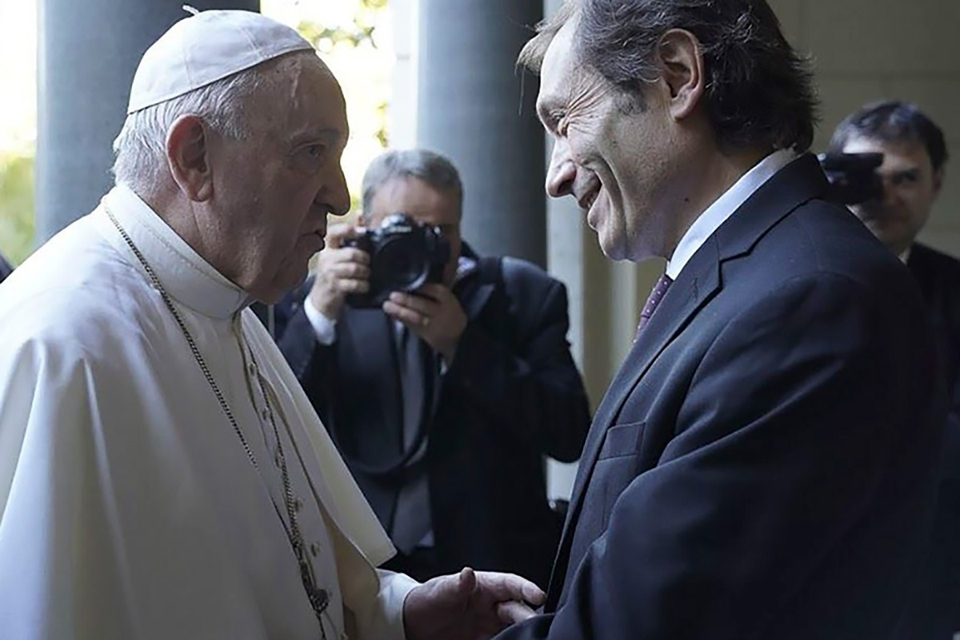

In [55]:
from IPython.display import Image
Image(img_data.content)

In [56]:
def extraer_imagen(soup_nota):
    #soup_nota.find('div', attrs={'class':'article-main-media-image'}).find_all('img')
    media = soup_nota.find('div', attrs={'class':'article-main-media-image'})
    if media is None:
        print('Nota sin imagen')
        return np.nan
    imagenes = media.find_all('img')
    if len(imagenes) == 0:
        print('no se encontraron imágenes')
    elif len(imagenes) == 1:
        # Hay un único link
        imagen = imagenes[0]
        img = imagen.get('data-src')
    else:
        imagen = media.find('img',attrs={'class':'show-for-xlarge'})
        if imagen is None:
            imagen = media.find('img',attrs={'class':'show-for-large'})
            if imagen is None:
                imagen = media.find('img',attrs={'class':'show-for-medium'})
                if imagen is None:
                    imagen = media.find('img',attrs={'class':'show-for-small'})
                    if imagen is None:
                        imagen = media.find('img',attrs={'class':'show-for-xsmall'})
                        if imagen is None:
                            print('No se pudo recuprerar imagen')
        if imagen is not None:
            img =  imagen.get('data-src')
    try:
        img_data = requests.get(img)
    except Exception as e:
        print('Error obteniendo imagen, con error', e)
    if img_data.status_code == 200:
        return img_data.content
    else:
        print('Error obteniendo imagen, con status code: ', img_data.status_code)
        return np.nan

In [65]:
import numpy as np
def scrap_nota(url):
    '''
    Función que recibe la URL de una nota y devuelve un diccionario con la información de la misma
    '''
    # Hago la request a la url de la nota
    nota = requests.get(url)
    # Verifico si hubo error
    if nota.status_code != 200:
        print('Error obteniendo nota. Status code: {}'.format(nota.status_code))
        return np.nan
    
    # Preparo el diccionario para el retorno
    ret_dict = {'url':url}
    
    # Parseo el contenido
    s_nota = BeautifulSoup(nota.text, 'lxml')
    
    # Extraigo la fecha
    try:
        ret_dict['fecha'] = s_nota.find('span', attrs={'pubdate':'pubdate'}).get('datetime')
    except:
        ret_dict['fecha'] = np.nan
    
    # Extraigo el titulo
    try:
        ret_dict['titulo'] = s_nota.find('h1', attrs={'class':'article-title'}).get_text()
    except:
        ret_dict['titulo'] = np.nan
    
    # Extraigo la volanta
    try:
        ret_dict['volanta'] = s_nota.find('h2', attrs={'class':'article-prefix'}).get_text()
    except:
        ret_dict['volanta'] = np.nan
    
    # Extraigo el copete
    try:
        ret_dict['copete'] = s_nota.find('div', attrs={'class':'article-summary'}).get_text()
    except:
        ret_dict['copete'] = np.nan
    
    # Extraigo el texto
    try:
        texto_nota = s_nota.find('div', attrs={'class':'article-text'})
        ret_dict['texto'] = scrap_texto(texto_nota)
    except:
        ret_dict['texto'] = np.nan
        
    # Extraigo el autor
    try:
        ret_dict['autor'] = s_nota.find('div', attrs={'class':'article-author'}).a.get_text()
    except:
        ret_dict['autor'] = np.nan
    
    # Extraigo la seccion
    try:
        ret_dict['seccion'] = s_nota.find('div', attrs={'class':'suplement'}).get_text()
    except:
        ret_dict['seccion'] = np.nan
    
    # Extraigo la imagen
    # ret_dict['imagen'] = extraer_imagen(s_nota)
    
    return ret_dict   

El papa Francisco nombró a Gustavo Béliz en la Academia Pontificia de Ciencias Sociales


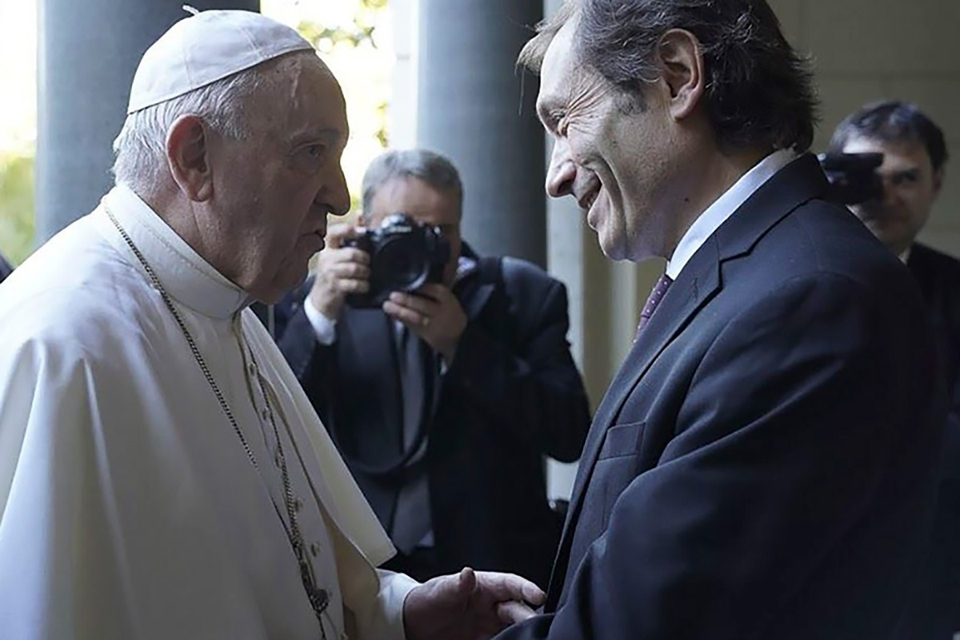

In [61]:
info_nota = scrap_nota('https://www.pagina12.com.ar/293244-el-papa-francisco-nombro-a-gustavo-beliz-en-la-academia-pont')
print(info_nota['titulo'])
Image(info_nota['imagen'])

Tenemos una función que a partir de la URL de un artículo, extrae toda la información deseada. Ahora armemos una lista de urls a escrapear:

In [66]:
data = []
for i,url in enumerate(notas):
    print(f'Scraping_nota {i+1}/{len(notas)}')
    data.append(scrap_nota(url))

Scraping_nota 1/524
Scraping_nota 2/524
Scraping_nota 3/524
Scraping_nota 4/524
Scraping_nota 5/524
Scraping_nota 6/524
Scraping_nota 7/524
Scraping_nota 8/524
Scraping_nota 9/524
Scraping_nota 10/524
Scraping_nota 11/524
Scraping_nota 12/524
Scraping_nota 13/524
Scraping_nota 14/524
Scraping_nota 15/524
Scraping_nota 16/524
Scraping_nota 17/524
Scraping_nota 18/524
Scraping_nota 19/524
Scraping_nota 20/524
Scraping_nota 21/524
Scraping_nota 22/524
Scraping_nota 23/524
Scraping_nota 24/524
Scraping_nota 25/524
Scraping_nota 26/524
Scraping_nota 27/524
Scraping_nota 28/524
Scraping_nota 29/524
Scraping_nota 30/524
Scraping_nota 31/524
Scraping_nota 32/524
Scraping_nota 33/524
Scraping_nota 34/524
Scraping_nota 35/524
Scraping_nota 36/524
Scraping_nota 37/524
Scraping_nota 38/524
Scraping_nota 39/524
Scraping_nota 40/524
Scraping_nota 41/524
Scraping_nota 42/524
Scraping_nota 43/524
Scraping_nota 44/524
Scraping_nota 45/524
Scraping_nota 46/524
Scraping_nota 47/524
Scraping_nota 48/524
S

In [73]:
df = pd.DataFrame(data)
df.head(5)

,url,fecha,titulo,volanta,copete,texto,autor,seccion
0,https://www.pagina12.com.ar/286876-metropoli,2020-08-23,Metrópoli,NaN,NaN,Me mudé en esta ciudad más de veinte veces. Y ...,Guillermo Saccomanno,Contratapa
1,https://www.pagina12.com.ar/292780-la-justicia...,2020-09-17,La justicia chilena ordenó el cierre del megap...,"Pertenecía a la canadiense Barrick Gold, que a...",NaN,La justicia chilena cerró definitivamente el p...,NaN,El mundo
2,https://www.pagina12.com.ar/293100-trump-asegu...,2020-09-18,Trump asegura vacunas para todos los estadouni...,Su promesa contradice las predicciones de los ...,NaN,El presidente estadounidense Donald Trump aseg...,NaN,El mundo
3,https://www.pagina12.com.ar/292646-un-sturzene...,2020-09-17,Un Sturzenegger que da consejos...,Cepo cambiario,NaN,El ex presidente del Banco Central Federico St...,NaN,Economía
4,https://www.pagina12.com.ar/291879-investigado...,2020-09-13,Investigadores argentinos lograron clonar embr...,La técnica podría ser aplicados en otras espec...,NaN,Investigadores argentinos liderados por la Fac...,NaN,Ciencia


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 524 entries, 0 to 523
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   url      524 non-null    object
 1   fecha    524 non-null    object
 2   titulo   524 non-null    object
 3   volanta  479 non-null    object
 4   copete   198 non-null    object
 5   texto    524 non-null    object
 6   autor    456 non-null    object
 7   seccion  524 non-null    object
dtypes: object(8)
memory usage: 32.9+ KB
